<a href="https://colab.research.google.com/github/ahsan-rahim/bai-fyp/blob/main/B_AI_FYP_Implementational_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pypng
!pip install pydicom
import numpy as np
import cv2
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline
import numpy as np 
import pydicom
import png
import os
import re


     |████████████████████████████████| 1.9MB 8.7MB/s 


In [ ]:
import numpy as np 
import pydicom
import png
import os
import re


findfiles = os.listdir('/home/navnit/mask_rcnn/AllDICOMs')
dcm = []

for file in findfiles:
  if file.endswith(".dcm"):
    dcm.append(os.path.join(file))

print(dcm)
print(len(dcm))


files = []
for name in dcm:
  files.append(re.findall( r"^([^.]*).*" , name)[0])
print(files)


for file in files:
    ds = pydicom.dcmread('/home/navnit/mask_rcnn/AllDICOMs/%s.dcm'%file)
    shape = ds.pixel_array.shape
    
   
    image_2d = ds.pixel_array.astype(float)

   
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 256

 
    image_2d_scaled = np.uint8(image_2d_scaled)

    with open('/home/navnit/mask_rcnn/AllPNGs/%s.png'%file, 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)


['50994137_cc9e66c5b31baab8_MG_R_ML_ANON.dcm', '50998177_f34ee0ab6591b792_MG_L_ML_ANON.dcm', '50995872_c94d8a1ebd452afe_MG_L_ML_ANON.dcm', '30011647_6968748e66837bc7_MG_R_CC_ANON.dcm', '53587427_d2befe622e188943_MG_L_ML_ANON.dcm', '50994327_cc9e66c5b31baab8_MG_L_ML_ANON.dcm', '22678670_61b13c59bcba149e_MG_R_ML_ANON.dcm', '50996137_71c1a60d57c5322f_MG_R_CC_ANON.dcm', '53581769_573747ee33ef6e5a_MG_L_ML_ANON.dcm', '30011530_349323117bf0fd93_MG_R_ML_ANON.dcm', '30011850_4f20c1285d8f0b1f_MG_R_ML_ANON.dcm', '50995899_c94d8a1ebd452afe_MG_L_CC_ANON.dcm', '22613822_45c7f44839fd9e68_MG_R_ML_ANON.dcm', '53587572_11e6732579acf692_MG_L_ML_ANON.dcm', '20588458_bf1a6aaadb05e3df_MG_R_CC_ANON.dcm', '50994273_cc9e66c5b31baab8_MG_R_CC_ANON.dcm', '24055725_f0f1a133837b5137_MG_L_ML_ANON.dcm', '50996736_330e5fe16929eed4_MG_R_CC_ANON.dcm', '20587466_d571b5880ad2a016_MG_L_CC_ANON.dcm', '20588046_024ee3569b2605dc_MG_R_ML_ANON.dcm', '24055779_f0f1a133837b5137_MG_L_CC_ANON.dcm', '50998086_66adfbb4f19c76d2_MG_R_M

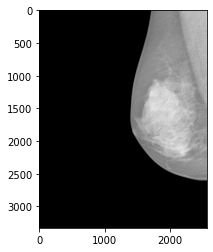

In [ ]:

img = cv2.imread('/home/navnit/mask_rcnn/AllPNGs/22580393_5eae9beae14d26fd_MG_R_ML_ANON.png')

img.shape
    


plt.imshow(img, cmap=plt.cm.bone)
plt.show()

In [ ]:

import os
file_sizes =[]
for filename in os.listdir('/home/navnit/mask_rcnn/AllPNGs/'):
    if filename.endswith(".png"):
      img = cv2.imread('/home/navnit/mask_rcnn/AllPNGs/'+filename)
      file_sizes.append(img.shape)

dim = set(file_sizes)
print(dim)

{(3328, 2560, 3), (4084, 3328, 3)}


In [ ]:
from skimage.draw import polygon
import numpy as np
import plistlib

def load_inbreast_mask(mask_path, imshape=(4084, 3328)):


    def load_point(point_string):
        x, y = tuple([float(num) for num in point_string.strip('()').split(',')])
        return y, x

    mask = np.zeros(imshape)
    with open(mask_path, 'rb') as mask_file:
        plist_dict = plistlib.load(mask_file, fmt=plistlib.FMT_XML)['Images'][0]
        numRois = plist_dict['NumberOfROIs']
        rois = plist_dict['ROIs']
        assert len(rois) == numRois
        for roi in rois:
            
            if(roi['Name']=='Mass'):
              numPoints = roi['NumberOfPoints']
              points = roi['Point_px']
              assert numPoints == len(points)
              points = [load_point(point) for point in points]
              if len(points) <= 2:
                  for point in points:
                      mask[int(point[0]), int(point[1])] = 1
              else:
                  x, y = zip(*points)
                  x, y = np.array(x), np.array(y)
                  poly_x, poly_y = polygon(x, y, shape=imshape)
                  mask[poly_x, poly_y] = 1
    return mask


mask = load_inbreast_mask('/home/navnit/mask_rcnn/AllXML/22580393.xml' , img.shape[0:2])

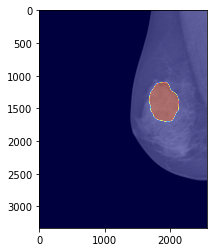

(3328, 2560)

In [ ]:
plt.imshow(img, cmap='gray')
plt.imshow(mask*255, cmap='jet', alpha=0.5)
plt.show()
img.shape
mask.shape

In [ ]:
import numpy as np

mask_img = mask.astype(np.uint8)

contours,hierarchy = cv2.findContours(mask_img,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
cnt = contours[0]

1


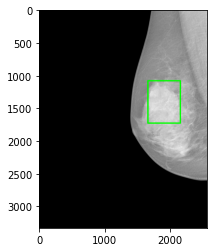

In [ ]:
for cnt in contours:
  
  x,y,w,h = cv2.boundingRect(cnt)
  img1 = cv2.rectangle(img,(x-20,y-20),(x+w+20,y+h+20),(0,255,0),20)

plt.imshow(img1)


In [ ]:
import numpy as np
import cv2
from skimage.measure import label, regionprops


class Preprocess:
  def __init__(self, rawim, im, breast_mask, lesion_mask):
    self.raw = rawim
    self.image = im
    self.mask = breast_mask
    self.lesion_mask = lesion_mask

  def extract_breast_profile(image,lesion_mask, if_crop):    
    breast_mask = np.zeros(np.shape(image))
    breast_mask[image>0]=1
    
    labelim = label(breast_mask)
    props =  regionprops(labelim)
    
   
    area = 0
    ind = 1
    for i in range(0,len(props)):
      if area<props[i].filled_area:
          area = props[i].filled_area
          ind = i+1
    breast_mask = np.zeros(np.shape(image))
    breast_mask[labelim==ind]=1  
    labelim = label(breast_mask)       
    props =  regionprops(labelim)
    boundingbox = props[0].bbox
    
    
    if if_crop == 1:
        breast_mask = breast_mask[boundingbox[0]:boundingbox[2],boundingbox[1]:boundingbox[3]]
        breast_raw_image = image[boundingbox[0]:boundingbox[2],boundingbox[1]:boundingbox[3]]
        lesion_mask = lesion_mask[boundingbox[0]:boundingbox[2],boundingbox[1]:boundingbox[3]]
    else:
        breast_raw_image = image
    
    breast_image = rescale2uint16(breast_raw_image,breast_mask)
    return Preprocess(breast_raw_image,breast_image,breast_mask,lesion_mask)


def rescale2uint16(image,breast_mask):
   intensity_in_mask = image[breast_mask>0]
  
   maxi = np.percentile(intensity_in_mask,99.8)
   mini = np.percentile(intensity_in_mask,0.2)
   
   
   image = 65535*(image-mini)/(maxi-mini)
   image[breast_mask==0] = 0
   image[image<0] = 0
   image[image>65535] = 65535
   image = np.uint16(image)
         
   return image

In [ ]:
image_path = "/home/navnit/mask_rcnn/AllPNGs/"
annotation_path = '/home/navnit/mask_rcnn/AllXML/'

file_names= os.listdir(image_path)
file_names = sorted(file_names)

print(file_names[:5])
new_file_names = []
temp_names = [x.split('_')[0] for x in file_names]
xml_names = [x.split('.')[0] for x in os.listdir(annotation_path)]
for i in range(len(temp_names)):
    if temp_names[i] in xml_names:
        new_file_names.append(file_names[i])

file_names = new_file_names

['20586908_6c613a14b80a8591_MG_R_CC_ANON.png', '20586934_6c613a14b80a8591_MG_L_CC_ANON.png', '20586960_6c613a14b80a8591_MG_R_ML_ANON.png', '20586986_6c613a14b80a8591_MG_L_ML_ANON.png', '20587054_b6a4f750c6df4f90_MG_R_CC_ANON.png']


In [ ]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skimage import io
from skimage.measure import label
import timeit

start = timeit.default_timer()

import warnings
warnings.filterwarnings("ignore")



def padimages(image,file_name, ratio):
    [length, width] = np.shape(image)
    if length/width>ratio:
        print('This image needs padding.')
        add_wid = round(length*(1/ratio)-width)
        pad = np.zeros((length,add_wid))
        pad = pad.astype(image.dtype)
        if '_R_' in file_name:
        #                
            pad_image = np.concatenate((pad,image),axis=1)
        else:
            pad_image = np.concatenate((image,pad),axis=1)
            
    return pad_image


image_path = "/home/navnit/mask_rcnn/AllPNGs/"
annotation_path = '/home/navnit/mask_rcnn/AllXML/'

save_image_path = "/home/navnit/mask_rcnn/preprocessed_image/"   
if not os.path.exists(save_image_path):        
    os.mkdir(save_image_path)
 
    
save_mask_path = "/home/navnit/mask_rcnn/preprocessed_mask/"    
if not os.path.exists(save_mask_path):        
    os.mkdir(save_mask_path)





for i in range(0,len(file_names)):
  print(file_names[i])
  mammo = io.imread(image_path+file_names[i],0)
  
  lesion_mask = load_inbreast_mask(annotation_path+file_names[i].split('_')[0]+'.xml', mammo.shape[0:2])
  
  if np.max(lesion_mask)>=0:

    
    breast_preprocess = Preprocess.extract_breast_profile(mammo,lesion_mask,1)
            
    mammo = breast_preprocess.image
    breast_mask = breast_preprocess.mask
    lesion_mask =breast_preprocess.lesion_mask    
    
    print ('Number of lesions: '+str(np.max(np.unique(label(lesion_mask)))))
    
    
    
    pad_mammo = padimages(mammo,file_names[i],1)
    
 

    io.imsave(save_image_path + file_names[i],pad_mammo)
    
    
    
    labelim = label(lesion_mask)
    if np.max(labelim)>0:
   

        for l in range(1,np.max(labelim+1)):
          l_mask = np.zeros(np.shape(labelim))
          l_mask = l_mask.astype(lesion_mask.dtype)
          l_mask [labelim==l] = 255
          num_nonzero = np.where(l_mask>0)
          num_nonzero = len(num_nonzero[0])

          if num_nonzero>15:
              print('A valid mask')
              
              pad_l_mask = padimages(l_mask,file_names[i],1)
              io.imsave(save_mask_path+file_names[i][:-4]+str(l)+'.png',pad_l_mask)
          else:
              print('Has a tiny piece of noise that is not valid for training!')
                
        else:
          pad_lesion_mask = padimages(lesion_mask,file_names[i],1)
          io.imsave(save_mask_path+file_names[i][:-4]+str(0)+'.png',pad_lesion_mask)
      
stop = timeit.default_timer()
print('RunTime per image: ', (stop - start)/ len(file_names)) 

In [ ]:
!apt install octave

In [ ]:
%%writefile /home/navnit/mask_rcnn/octave_file/Read_files_in_folder.m

function [ item_name ] = Read_files_in_folder( path, mode )

% This is a fuction that reads the files/folders under a folder path
%   INPUT   path   the folder path
%           mode   whether the user want read files or folders
%   OUTPUT  item_name    return the names of the items under the path

pt=dir(path);

item_name = {}; 

M=length(pt);

k = 0;
format short


for i = 1 : M
    if strcmp(pt (i).name, '.') || strcmp(pt (i).name, '..')||(pt(i).isdir==0 && strcmp(mode,'folder'))
        continue;
    else
            k = k + 1;
            item_name{k} = pt (i).name;
    end
    
end

end

Overwriting /home/navnit/mask_rcnn/octave_file/Read_files_in_folder.m


In [ ]:
%%writefile /home/navnit/mask_rcnn/octave_file/Normalization_mask.m

function [new_im] = Normalization_mask(image,mask,mode)

image = double(image);
inten = image(mask==1);
mini = min(inten);
maxi = max(inten);

image = (image-mini)./abs(maxi-mini);
image(mask<1) = 0;
if mode == 8
    new_im = uint8(image*255);
    
elseif mode==16
    new_im = uint16(image*65535);
    
elseif strcmp(mode,'double')
    new_im = double(image);
end
end


Overwriting /home/navnit/mask_rcnn/octave_file/Normalization_mask.m


In [ ]:
%%writefile /home/navnit/mask_rcnn/octave_file/Morphological_sifter.m

function [enhanced_image]= Morphological_sifter(M1,M2,orientation,image,L_or_R, padding_option, breast_mask)%,rowmin,colmin

% This is a function that does multi-scale morphological sifting used
% linear structuring elements (LSE) with given length
% INPUT  M1,M2: Length of the LSEs  M1>M2
%       orientation: Orientations of the LSEs in degrees, it is a 1*N
%       vector containing the angles of each LSE
%       image: The input image to be processed
%       L_or_R: Indicator of left or right breast
%       padding_option: Image boundary padding options. 
%                       If set to 0, pad the boundary with highest
%                       intensity value.
%                       If set to 1, pad it with replications of the pixels
%                       on the boundary
%       breast_mask: The binary breast mask
%OUTPUT enhanced_image: The output image from MMS
%       


newimage = image;
[m,n]=size(newimage);

%% Border effect control: border padding
% Option 1: pad with highest pixel value
temp = uint16(65535*ones(m+4*M1,n+4*M1));
temp(2*M1+1:2*M1+m,2*M1+1:2*M1+n) = newimage; % Add white margins to each side of the image to prevent edge effect of morphological process

% Option 2: replicate the pixels on the border
if padding_option == 1
    if L_or_R == 1% left breast
        edge = newimage(:,1:min(n,2*M1)) ;
        temp(2*M1+1:2*M1+m,2*M1-size(edge,2)+1:2*M1)= fliplr(edge);
    else % right breast
        edge = newimage(:,max(1,n-2*M1+1):n) ;
        temp(2*M1+1:2*M1+m,n+2*M1+1:n+2*M1+size(edge,2))= fliplr(edge);
    end
end

%% Apply multi-scale morphological sifting
enhanced_image = zeros(size(temp));
for k = 1:length(orientation)
    B1=strel('line',M1,orientation(k));
    B2=strel('line',M2,orientation(k));
    bg1=imopen(temp,B1);
    r1=imsubtract(temp,bg1);
    r2=imopen(r1,B2);
    enhanced_image = enhanced_image + double(r2);
    
end

enhanced_image = enhanced_image(2*M1+1:2*M1+m,2*M1+1:2*M1+n); % Reset the image into the original size
[enhanced_image] = Normalization_mask(enhanced_image,breast_mask,8);

end

Overwriting /home/navnit/mask_rcnn/octave_file/Morphological_sifter.m


In [ ]:
%%writefile /home/navnit/mask_rcnn/octave_file/Morphological_filter_bank.m

function [ len_bank ] = Morphological_filter_bank( Num_scale, D, type )

%   This function generates the length of the linear structuring elements (LSE) 
%   used in morphological filter elements on different scales. Either
%   linear or logarithmic scale interval is used.
%   INPUT     Num_scale  The number of scales used
%             D          The diameter range of breast masses
%             
%             type       The scale type (linear or logarithmic)
%   OUTPUT    len_bank    The magnitudes of the LSEs

if strcmp(type,'linear')
scale_interval = ceil((D(2) - D(1))/Num_scale);
len_bank = zeros(1,Num_scale+1);
    for l = 1:Num_scale+1
        len_bank (l) = D(1) + (l-1) * scale_interval;
    end
    % This is a linear bank
    len_bank(Num_scale+1) = D(2);

end


if strcmp (type, 'exponential')
   scale_interval =  (D(2)/D(1))^(1/Num_scale);
   for l = 1:Num_scale+1
        len_bank (l) = round( D(1) * (scale_interval^(l-1)) );
    end
    % This is a linear bank
    len_bank(Num_scale+1) = D(2);
    
end
end


Overwriting /home/navnit/mask_rcnn/octave_file/Morphological_filter_bank.m


In [ ]:
!octave -W /home/navnit/mask_rcnn/octave_file/Read_files_in_folder.m
!octave -W /home/navnit/mask_rcnn/octave_file/Normalization_mask.m
!octave -W /home/navnit/mask_rcnn/octave_file/Morphological_sifter.m
!octave -W /home/navnit/mask_rcnn/octave_file/Morphological_filter_bank.m

In [ ]:
%%writefile /home/navnit/mask_rcnn/octave_file/Pseudo_Coloring.m

% Try to feed in gradient and morphological filtered images in to different
% channal
clc,clear,close all;
tic

image_path = '\home\navnit\mask_rcnn\preprocessed_image\';
image_save_path = 'pseudo_color_image';

if ~exist(image_save_path,'dir')
    mkdir(image_save_path)
end
item_names = Read_files_in_folder( image_path, 'files' );

mass_size_range_mm = [15 3689];% square mm
resolution = 0.07;% spatial resolution of the INbreast mammograms, 0.07mm
resize_ratio = 1/4;
mass_diameter_range_pixel = [floor((mass_size_range_mm(1)/pi)^0.5*2/(resolution/resize_ratio)),...
    ceil((mass_size_range_mm(2)/pi)^0.5*2/(resolution/resize_ratio))];% diameter range in pixels

for i = 1:length(item_names)
    close all;
    disp(item_names{i});
    image = imread(strcat(image_path,item_names{i}));
    
    %% Image subsampling using 2 level db2 wavelet
    image = image(:,:,1);
    breast_mask = (image>0);
    [cA,~,~,~] = dwt2(image,'db2');
    [image,~,~,~] = dwt2(cA,'db2');
    
    [cA,~,~,~] = dwt2(breast_mask,'db2');
    [breast_mask,~,~,~] = dwt2(cA,'db2');
    breast_mask = (breast_mask>=1);
    
    
    % Normalize the grayscale image
    [new_im] = Normalization_mask(image,breast_mask,8);
    %     figure,imshow(new_im);
    
    %% Apply multi-scale morphological sifting and append the images from 2 scales to the grayscale mammogram
    L_OR_R = isempty(strfind(item_names{i},'_R_'));% check if it is a left or right breast
    CC_OR_ML = isempty(strfind(item_names{i},'_CC_'));
    degree_bank = 0:10:170;% The orientations of the linear structuring elements (LSEs)
    Num_scale = 2; % Using 2 scales
    % Generate the length for LSEs on different scales
    [ len_bank ] = Morphological_filter_bank( Num_scale, mass_diameter_range_pixel, 'exponential' );
    enhanced_image = {};
    for j = 1:Num_scale
        % Boundary padding
        padding_mode = 1;%
        if j==1||CC_OR_ML==1
            %           if it is a small scale or it is a MLO view
            padding_mode = 0;% highest value padding
        end
        [enhanced_image{j}] = Morphological_sifter(len_bank(j+1),len_bank(j),degree_bank,new_im,L_OR_R, padding_mode, breast_mask);
        %
    end
    Pseudo_color_im = cat(3,new_im,enhanced_image{1},enhanced_image{2});
        figure,imshow(Pseudo_color_im);
        imwrite(Pseudo_color_im,strcat(image_save_path,item_names{i}));
end
elapsedTime = toc;

%% Process the annotation masks, so that they are the same size as the mammograms
anno_path = '\home\navnit\mask_rcnn\preprocessed_mask\';
anno_save_path = 'pseudo_preprocessed_mask';
if ~exist(anno_save_path,'dir')
    mkdir(anno_save_path)
end

item_names = Read_files_in_folder( anno_path, 'files' );
for i = 1:length(item_names)
    anno = imread(strcat(anno_path,item_names{i}));
    anno(anno==255) = 1;
    anno= double(anno);
    [cA,~,~,~] = dwt2(anno,'db2');
    [anno,~,~,~] = dwt2(cA,'db2');
    anno = abs(anno);
    anno(anno>=1) = 255;
    anno(anno<1) = 0;
    anno = uint8(anno);
        imwrite(anno,strcat(anno_save_path,item_names{i}));
end

Overwriting /home/navnit/mask_rcnn/octave_file/Pseudo_Coloring.m


In [ ]:
!octave -W /home/navnit/mask_rcnn/octave_file/Pseudo_Coloring.m

In [ ]:
from shutil import copy2
import os


labels = pd.read_csv(r'/home/navnit/mask_rcnn/BoundingBoxes_Mass_Classes_2.csv')
def mass_png():
 
  allPNGs = os.listdir('/home/navnit/mask_rcnn/AllPNGs')
  print(allPNGs[0:5])
  print(len(labels))
  
  label = labels.drop_duplicates(['image_name'])
  print(len(label))
  for row in label.itertuples(index=False):
    print(row.image_name)
    copy2('/home/navnit/mask_rcnn/AllPNGs/'+row.image_name, '/home/navnit/mask_rcnn/mass_PNGs/')

mass_png()

In [ ]:
import os, sys
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)


In [ ]:

%cd '/content/drive/MyDrive/BCD/Mask_RCNN'
!python setup.py install

!pip show mask-rcnn

In [ ]:
from skimage.draw import polygon
import numpy as np
import plistlib
from mrcnn.utils import Dataset
import matplotlib as plt
%matplotlib inline
import cv2 as cv
from numpy import asarray
import os
import pandas as pd


class MammogramData(Dataset):
  
  def load_dataset(self, directory, is_train = True):
    
    self.add_class("dataset", 1, "Benign")
    self.add_class("dataset", 2, "Malignant")
    self.add_class("dataset", 3, "Suspicious Anomaly")
    
    image_directory = directory + '/mass_PNGs/'
    annotation_directory = directory + '/AllXML/'
    png_dir = os.listdir(image_directory)
    png_dir = sorted(png_dir)
    count=0
    for file in png_dir:
      image_id = int(file[:8]) 
      
      img_path = image_directory + file
      ann_path = annotation_directory +str(image_id) + '.xml'  
     
      if (is_train and count <= 80):
        self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
      

      if ((is_train == False) and count > 80):
        self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
      
      
      count+=1
    print(count)
    
  def load_mask(self, image_id , imshape=(4084, 3328)):
    def load_point(point_string):
        x, y = tuple([float(num) for num in point_string.strip('()').split(',')])
        return y, x

    labels = pd.read_csv("/home/navnit/mask_rcnn/BoundingBoxes_Mass_Classes_2.csv")
    info = self.image_info[image_id]

    
   
    mask_path = info['annotation']
    
    mask = np.zeros(imshape)
    masks = []
    imshape = cv.imread(info['path']).shape[0:2]
    class_name = labels[labels['File Name'].isin([info['id']])]['Class'].values[0]
    
    with open(mask_path, 'rb') as mask_file:
        class_ids = []
        plist_dict = plistlib.load(mask_file, fmt=plistlib.FMT_XML)['Images'][0]
        numRois = plist_dict['NumberOfROIs']
        rois = plist_dict['ROIs']
        assert len(rois) == numRois
        
        for roi in rois:
            
            if(roi['Name']=='Mass'):
              mask = np.zeros(imshape)
              numPoints = roi['NumberOfPoints']
              points = roi['Point_px']
              assert numPoints == len(points)
              points = [load_point(point) for point in points]
              if len(points) <= 2:
                  for point in points:
                      mask[int(point[0]), int(point[1])] = 1
              else:
                  x, y = zip(*points)
                  x, y = np.array(x), np.array(y)
                  poly_x, poly_y = polygon(x, y, shape=imshape)
                  mask[poly_x, poly_y] = 1
              masks.append(mask)
              class_ids.append(self.class_names.index(class_name))
    
    
    masks=np.array(masks)
    masks=masks.transpose((1, 2, 0))
    return masks, asarray(class_ids, dtype='int32')

 
  def load_ref(self, image_id):
    info = self.image_info[image_id]
    return info['path']



In [ ]:

train_set = MammogramData()
train_set.load_dataset('/home/navnit/mask_rcnn', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
print(train_set.image_ids)
 


107
Train: 81
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]


In [ ]:


test_set = MammogramData()
test_set.load_dataset('/home/navnit/mask_rcnn', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))
print(test_set.image_ids)

107
Test: 26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


(4084, 3328, 3)
(4084, 3328, 2)
[1 1]
2


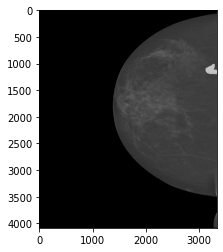

In [ ]:
image_id = 0
image = train_set.load_image(image_id)
print(image.shape)

masks, class_ids = train_set.load_mask(image_id)
print(masks.shape)
print(class_ids)

print(masks.shape[2])

for i in range(masks.shape[2]):
  plt.pyplot.imshow(image)
 
  plt.pyplot.imshow(masks[:, :, i], cmap='gray', alpha=0.5)
plt.pyplot.show()


In [ ]:
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes


image_id = 2

image = test_set.load_image(image_id)

mask, class_ids = train_set.load_mask(image_id)

bbox = extract_bboxes(mask)
print(bbox)
print(class_ids)

display_instances(image, bbox, mask, class_ids, train_set.class_names)

In [ ]:
'''
%tensorflow_version 1.15.3
!pip install keras==2.2.4
'''
import tensorflow
import keras
print(keras.__version__)
print(tensorflow.__version__)

2.5.0
2.5.0


In [ ]:
from mrcnn.config import Config
class MammogramConfig(Config):

  
    NAME = "SMALL"

   
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1


    NUM_CLASSES = 1 + 1 + 1 + 1  

.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128


    RPN_ANCHOR_SCALES = (8, 16, 64, 128, 256)  


    TRAIN_ROIS_PER_IMAGE = 800


    STEPS_PER_EPOCH = 81


    VALIDATION_STEPS = 26
    
config = MammogramConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
from mrcnn.model import MaskRCNN
model = MaskRCNN(mode='training', model_dir='/home/navnit/mask_rcnn/Config_files', config=config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [ ]:
model.load_weights('/home/navnit/mask_rcnn/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [ ]:
import imgaug.augmenters as iaa

augmentation = iaa.Sometimes(.667, iaa.Sequential([
    iaa.Fliplr(0.5), 
    iaa.Crop(percent=(0, 0.1)),

    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.25))
    ),
  
    iaa.ContrastNormalization((0.75, 1.5)),
    
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255)),
    
    iaa.Multiply((0.8, 1.2)),
    
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        
        rotate=(-180, 180),
        
    )
], random_order=True))

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads', augmentation=augmentation ,custom_callbacks=[tqdm_callback])


Starting at epoch 0. LR=0.001

Checkpoint Path: /home/navnit/mask_rcnn/Config_files/small20210627T2159/mask_rcnn_small_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_dec

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolat

Training:   0%|           0/5 ETA: ?s,  ?epochs/s

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

Epoch 1/5


0/81           ETA: ?s - 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


Epoch 1/5


/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/ROI/GatherV2_1_grad/Reshape_1:0", shape=(4092,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/ROI/GatherV2_1_grad/Reshape:0", shape=(4092, 4), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/ROI/GatherV2_1_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  wa

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

80/81 [============================>.] - ETA: 48s - batch: 39.5000 - size: 1.0000 - loss: 1.9582 - rpn_class_loss: 0.0401 - rpn_bbox_loss: 0.8289 - mrcnn_class_loss: 0.0167 - mrcnn_bbox_loss: 0.5973 - mrcnn_mask_loss: 0.4752 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - ETA: 0s - batch: 40.0000 - size: 1.0000 - loss: 1.9448 - rpn_class_loss: 0.0399 - rpn_bbox_loss: 0.8292 - mrcnn_class_loss: 0.0165 - mrcnn_bbox_loss: 0.5899 - mrcnn_mask_loss: 0.4694 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - 4116s 51s/step - batch: 40.0000 - size: 1.0000 - loss: 1.9448 - rpn_class_loss: 0.0399 - rpn_bbox_loss: 0.8292 - mrcnn_class_loss: 0.0165 - mrcnn_bbox_loss: 0.5899 - mrcnn_mask_loss: 0.4694 - val_loss: 1.2535 - val_rpn_class_loss: 0.0438 - val_rpn_bbox_loss: 1.2095 - val_mrcnn_class_loss: 1.7947e-04 - val_mrcnn_bbox_loss: 0.0000e+00 - val_mrcnn_mask_loss: 0.0000e+00
Epoch 2/5


0/81           ETA: ?s - 

Epoch 2/5
80/81 [============================>.] - ETA: 48s - batch: 39.5000 - size: 1.0000 - loss: 2.2465 - rpn_class_loss: 0.0308 - rpn_bbox_loss: 1.1475 - mrcnn_class_loss: 0.0062 - mrcnn_bbox_loss: 0.5635 - mrcnn_mask_loss: 0.4984 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - ETA: 0s - batch: 40.0000 - size: 1.0000 - loss: 2.2385 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 1.1384 - mrcnn_class_loss: 0.0062 - mrcnn_bbox_loss: 0.5627 - mrcnn_mask_loss: 0.5006 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - 4047s 50s/step - batch: 40.0000 - size: 1.0000 - loss: 2.2385 - rpn_class_loss: 0.0306 - rpn_bbox_loss: 1.1384 - mrcnn_class_loss: 0.0062 - mrcnn_bbox_loss: 0.5627 - mrcnn_mask_loss: 0.5006 - val_loss: 4.5602 - val_rpn_class_loss: 0.0638 - val_rpn_bbox_loss: 1.7253 - val_mrcnn_class_loss: 0.0082 - val_mrcnn_bbox_loss: 2.1573 - val_mrcnn_mask_loss: 0.6056
Epoch 3/5


0/81           ETA: ?s - 

Epoch 3/5
80/81 [============================>.] - ETA: 49s - batch: 39.5000 - size: 1.0000 - loss: 1.4502 - rpn_class_loss: 0.0213 - rpn_bbox_loss: 0.3272 - mrcnn_class_loss: 0.0065 - mrcnn_bbox_loss: 0.5187 - mrcnn_mask_loss: 0.5765 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - ETA: 0s - batch: 40.0000 - size: 1.0000 - loss: 1.4380 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.3233 - mrcnn_class_loss: 0.0065 - mrcnn_bbox_loss: 0.5127 - mrcnn_mask_loss: 0.5743 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - 4117s 51s/step - batch: 40.0000 - size: 1.0000 - loss: 1.4380 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.3233 - mrcnn_class_loss: 0.0065 - mrcnn_bbox_loss: 0.5127 - mrcnn_mask_loss: 0.5743 - val_loss: 1.4476 - val_rpn_class_loss: 0.0563 - val_rpn_bbox_loss: 1.3913 - val_mrcnn_class_loss: 2.1714e-05 - val_mrcnn_bbox_loss: 0.0000e+00 - val_mrcnn_mask_loss: 0.0000e+00
Epoch 4/5


0/81           ETA: ?s - 

Epoch 4/5
80/81 [============================>.] - ETA: 48s - batch: 39.5000 - size: 1.0000 - loss: 1.2225 - rpn_class_loss: 0.0185 - rpn_bbox_loss: 0.3596 - mrcnn_class_loss: 0.0083 - mrcnn_bbox_loss: 0.3405 - mrcnn_mask_loss: 0.4956 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - ETA: 0s - batch: 40.0000 - size: 1.0000 - loss: 1.2149 - rpn_class_loss: 0.0185 - rpn_bbox_loss: 0.3558 - mrcnn_class_loss: 0.0082 - mrcnn_bbox_loss: 0.3379 - mrcnn_mask_loss: 0.4945 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - 4068s 50s/step - batch: 40.0000 - size: 1.0000 - loss: 1.2149 - rpn_class_loss: 0.0185 - rpn_bbox_loss: 0.3558 - mrcnn_class_loss: 0.0082 - mrcnn_bbox_loss: 0.3379 - mrcnn_mask_loss: 0.4945 - val_loss: 1.3244 - val_rpn_class_loss: 0.0668 - val_rpn_bbox_loss: 1.2576 - val_mrcnn_class_loss: 3.0261e-06 - val_mrcnn_bbox_loss: 0.0000e+00 - val_mrcnn_mask_loss: 0.0000e+00
Epoch 5/5


0/81           ETA: ?s - 

Epoch 5/5
80/81 [============================>.] - ETA: 48s - batch: 39.5000 - size: 1.0000 - loss: 1.0311 - rpn_class_loss: 0.0113 - rpn_bbox_loss: 0.1586 - mrcnn_class_loss: 0.0098 - mrcnn_bbox_loss: 0.3720 - mrcnn_mask_loss: 0.4794 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - ETA: 0s - batch: 40.0000 - size: 1.0000 - loss: 1.0265 - rpn_class_loss: 0.0112 - rpn_bbox_loss: 0.1568 - mrcnn_class_loss: 0.0097 - mrcnn_bbox_loss: 0.3700 - mrcnn_mask_loss: 0.4788 

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/home/navnit/anaconda3/envs/mask_rcnn/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data t

81/81 [==============================] - 4034s 50s/step - batch: 40.0000 - size: 1.0000 - loss: 1.0265 - rpn_class_loss: 0.0112 - rpn_bbox_loss: 0.1568 - mrcnn_class_loss: 0.0097 - mrcnn_bbox_loss: 0.3700 - mrcnn_mask_loss: 0.4788 - val_loss: 1.4131 - val_rpn_class_loss: 0.0586 - val_rpn_bbox_loss: 1.3544 - val_mrcnn_class_loss: 2.0394e-05 - val_mrcnn_bbox_loss: 0.0000e+00 - val_mrcnn_mask_loss: 0.0000e+00


In [ ]:
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

class PredictionConfig(Config):
    NAME = "predConfig"


    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 1 + 1 + 1  

    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512

    RPN_ANCHOR_SCALES = (8, 16, 64, 128, 256)  

    TRAIN_ROIS_PER_IMAGE = 600

    STEPS_PER_EPOCH = 150
    USE_MINI_MASK = False

    DETECTION_MAX_INSTANCES = 10

    DETECTION_MIN_CONFIDENCE = 0.60


In [ ]:
import cv2
from mrcnn.model import mold_image
!pwd
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='/home/navnit/mask_rcnn/Config_files/small20210627T2159/', config=config)
model.load_weights('/home/navnit/mask_rcnn/Config_files/small20210627T2159/mask_rcnn_small_0005.h5', by_name=True)


In [ ]:
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image


def evaluate_model(dataset, model, cfg):
	APs = list()
	for image_id in dataset.image_ids:
	
		image = dataset.load_image(image_id)
        
		scaled_image = mold_image(image, cfg)
	
		sample = expand_dims(image, 0)

		yhat = model.detect(sample, verbose=0)

		r = yhat[0]
        

		AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
		print(AP)
   
		APs.append(AP)

	mAP = mean(APs)
	return mAP



In [ ]:

cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='/home/navnit/mask_rcnn/Config_files/small20210627T2159', config=config)
model.load_weights('/home/navnit/mask_rcnn/Config_files/small20210627T2159/mask_rcnn_small_0003.h5', by_name=True)
image = cv2.imread('/home/navnit/mask_rcnn/preprocessed_image/20587612_f4b2d377f43ba0bd_MG_R_CC_ANON.png')
scaled_image = mold_image(image, config)
sample = np.expand_dims(scaled_image, 0)
yhat = model.detect(sample, verbose=0)
print(yhat)

In [ ]:
from mrcnn.visualize import display_instances
display_instances(scaled_image, yhat[0]['rois'], yhat[0]['masks'], yhat[0]['class_ids'], train_set.class_names)

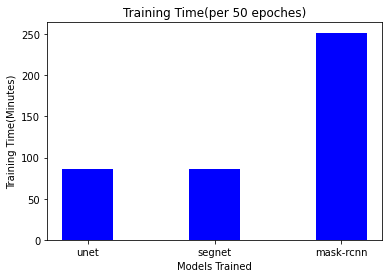

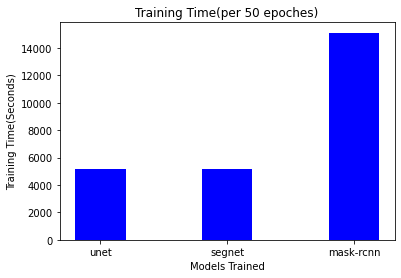

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
models = ['unet','segnet','mask-rcnn']
time_in_mins = [85.71428571,85.71428571,251.8518519]
time_in_sec = [5142.857143,5142.857143,15111.11111]
plt.bar(models, time_in_mins, color ='blue',width = 0.4)
 
plt.xlabel("Models Trained")
plt.ylabel("Training Time(Minutes)")
plt.title("Training Time(per 50 epoches)")
plt.show()


plt.bar(models, time_in_sec, color ='blue',width = 0.4)
 
plt.xlabel("Models Trained")
plt.ylabel("Training Time(Seconds)")
plt.title("Training Time(per 50 epoches)")
plt.show()
